In [107]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
%matplotlib inline

Sigmoid function:
$$sig(z) = \frac{1}{1 + e^{-z}}$$

Hypothesis function: 
$$h_w(\vec{x}) = sig(\vec{x} \cdot \vec{w} + b)$$

In [108]:
# This function computes the hypothesis for logistic regression
def hypothesis(x, w, b):
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    z = np.dot(x, w) + b
    return sigmoid(z)

Cost function:
$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right]$$

Here, 

$y^{(i)}$ is the $i$ th target derived from the training data.

$x^{(i)}$ is the $i$ th feature derived from the training data.

$m$ is the traning dataset length

In [109]:
# This function computes the cost for logistic regression
def cost_function(x, y, w, b):
    m = len(y)
    h = hypothesis(x, w, b)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Clip values to avoid log(0)
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

Gradient function:
$$
\begin{aligned}
\frac{\partial}{\partial w_j}J(w, b) &= \frac{1}{m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right) x_j^{(i)} \\
\frac{\partial}{\partial b}J(w, b) &= \frac{1}{m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right)
\end{aligned}
$$

In [110]:
# This function computes the gradient for logistic regression
def gradient(x, y, w, b):
    m = len(y)
    h = hypothesis(x, w, b)
    dw = (1/m) * np.dot(x.T, (h - y))
    db = (1/m) * np.sum(h - y)
    return dw, db

Gradient Descent Update Rules:
$$
w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w, b)
$$
$$
b := b - \alpha \frac{\partial}{\partial b} J(w, b)
$$

Where:
- $w_j$ is the weight for the $j$ -th feature.
- $b$ is the bias term.
- $\alpha$ is the learning rate.
- $\frac{\partial}{\partial w_j} J(w, b)$ is the gradient of the cost function with respect to $w_j$.
- $\frac{\partial}{\partial b} J(w, b)$ is the gradient of the cost function with respect to $b$.

In [111]:
# This function performs gradient descent for logistic regression
def gradient_descent(x, y, w, b, alpha, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        dw, db = gradient(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
        
    return w, b, cost_history

In [112]:
# This function trains the logistic regression model
def train_logistic_regression(x, y, alpha=0.01, num_iterations=1000):
    m, n = x.shape #number of samples and features
    w = np.zeros(n) #initialize weights to zeros
    b = 0 #initialize bias to zero
    w, b, cost_history = gradient_descent(x, y, w, b, alpha, num_iterations)
    return w, b, cost_history

In [125]:
# Load the dataset
df = pd.read_csv('2featureData.csv')
df.head()

,Hours_Studied,Sleep_Hours,Passed
0,1.0,5.0,0
1,2.0,4.5,0
2,2.0,6.0,0
3,3.0,4.0,0
4,3.0,6.5,0


In [114]:
#split the data into features and target
features_all = np.array(df.iloc[:, :-1])  # All columns except the last one
target_all = np.array(df.iloc[:, -1])     # Last column as target

# Split the data into training and testing sets
features, features_test, target, target_test = train_test_split(features_all, target_all, test_size=0.15)

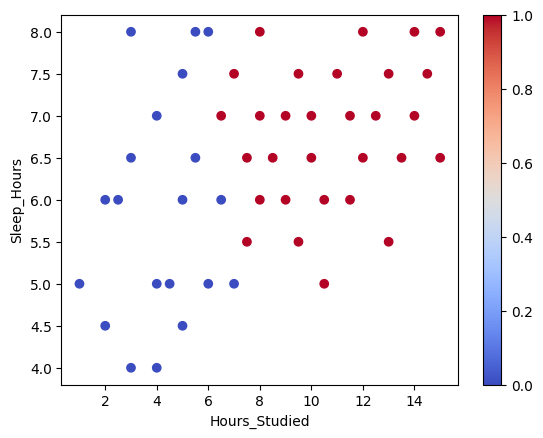

In [123]:
if features_all.shape[1] < 3:
    # Assuming target_all contains 0s and 1s for classification
    plt.scatter(features_all[:, 0], features_all[:, 1], c=target_all, cmap='coolwarm')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.colorbar()  # Show color scale

In [116]:
# Train the logistic regression model
alpha = 0.0002
num_iterations = 100000
w, b, cost_history = train_logistic_regression(features, target, alpha, num_iterations)

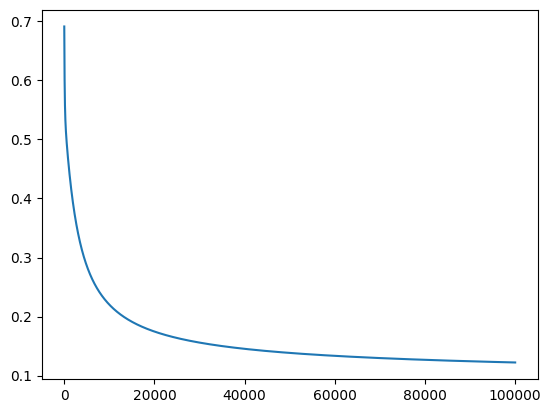

In [117]:
# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)

In [118]:
print("Final cost:", cost_history[-1], ", Weights:", w, ", Bias:", b) # Final cost, weights and bias

Final cost: 0.12220341518618136 , Weights: [ 1.35575477 -1.25365836] , Bias: -0.4581126046550196


In [119]:
def predict(x, w, b):
    return (hypothesis(x, w, b) >= 0.5).astype(int)

In [120]:
# Make predictions on the test set
predictions = predict(features_test, w, b)
predictions, target_test

(array([0, 0, 1, 1, 0, 1, 1, 1]), array([1, 0, 0, 0, 0, 0, 1, 1], dtype=int64))

In [121]:
# Calculate accuracy
accuracy = np.mean(predictions == target_test) * 100
accuracy

50.0